In [1]:
!pip install scikit-fuzzy numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.7 MB/s eta 0:00:00



=== HASIL ANALISIS FUZZY: TINGKAT KEMACETAN JALAN ===
    jumlah_kendaraan  kecepatan  tingkat_kemacetan kategori
0                 24         18          55.164659   Sedang
1                 50         45          50.000000   Sedang
2                 72         33          63.032980   Sedang
3                 90         22          84.064516    Macet
4                 92         80          50.000000   Sedang
5                 40         70          40.009215   Sedang
6                 11         11          50.000000   Sedang
7                 47         13          85.603774    Macet
8                 73         72          51.222358   Sedang
9                 85         83          50.000000   Sedang
10                31         23          66.212245    Macet
11                58         24          71.370370    Macet
12                30         18          64.486314   Sedang
13                48         17          84.976608    Macet
14                13         20          50.0

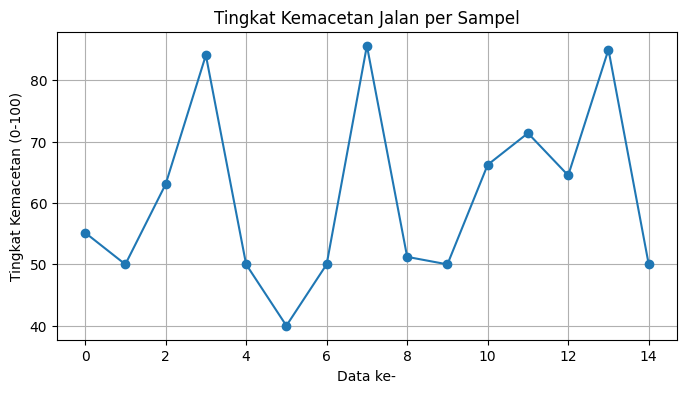

In [9]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt


jumlah_kendaraan = ctrl.Antecedent(np.arange(0, 101, 1), 'jumlah_kendaraan')
kecepatan = ctrl.Antecedent(np.arange(0, 101, 1), 'kecepatan')
kemacetan = ctrl.Consequent(np.arange(0, 101, 1), 'kemacetan')

jumlah_kendaraan['sedikit'] = fuzz.trimf(jumlah_kendaraan.universe, [0, 0, 40])
jumlah_kendaraan['sedang'] = fuzz.trimf(jumlah_kendaraan.universe, [20, 50, 80])
jumlah_kendaraan['banyak'] = fuzz.trimf(jumlah_kendaraan.universe, [60, 100, 100])

kecepatan['lambat'] = fuzz.trimf(kecepatan.universe, [0, 0, 40])
kecepatan['sedang'] = fuzz.trimf(kecepatan.universe, [20, 50, 80])
kecepatan['cepat'] = fuzz.trimf(kecepatan.universe, [60, 100, 100])

kemacetan['lancar'] = fuzz.trimf(kemacetan.universe, [0, 0, 40])
kemacetan['sedang'] = fuzz.trimf(kemacetan.universe, [20, 50, 80])
kemacetan['macet'] = fuzz.trimf(kemacetan.universe, [60, 100, 100])


rule1 = ctrl.Rule(jumlah_kendaraan['sedikit'] & kecepatan['cepat'], kemacetan['lancar'])
rule2 = ctrl.Rule(jumlah_kendaraan['sedang'] & kecepatan['sedang'], kemacetan['sedang'])
rule3 = ctrl.Rule(jumlah_kendaraan['banyak'] & kecepatan['lambat'], kemacetan['macet'])
rule4 = ctrl.Rule(jumlah_kendaraan['banyak'] & kecepatan['sedang'], kemacetan['macet'])
rule5 = ctrl.Rule(jumlah_kendaraan['sedang'] & kecepatan['cepat'], kemacetan['lancar'])
rule6 = ctrl.Rule(jumlah_kendaraan['sedikit'] & kecepatan['lambat'], kemacetan['sedang'])
rule7 = ctrl.Rule(jumlah_kendaraan['sedang'] & kecepatan['lambat'], kemacetan['macet'])
rule8 = ctrl.Rule(jumlah_kendaraan['banyak'] & kecepatan['cepat'], kemacetan['sedang'])


kemacetan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
kemacetan_sim = ctrl.ControlSystemSimulation(kemacetan_ctrl)


data = {
    'jumlah_kendaraan': [24, 50, 72, 90, 92, 40, 11, 47, 73, 85, 31, 58, 30, 48, 13],
    'kecepatan': [18, 45, 33, 22, 80, 70, 11, 13, 72, 83, 23, 24, 18, 17, 20]
}
df = pd.DataFrame(data)


hasil_fuzzy = []

for i in range(len(df)):
    try:
        kemacetan_sim.input['jumlah_kendaraan'] = df.loc[i, 'jumlah_kendaraan']
        kemacetan_sim.input['kecepatan'] = df.loc[i, 'kecepatan']
        kemacetan_sim.compute()
        hasil_fuzzy.append(kemacetan_sim.output['kemacetan'])
    except Exception as e:
        print(f"⚠️ Warning (row {i}): {e}")
        hasil_fuzzy.append(np.nan)

df['tingkat_kemacetan'] = hasil_fuzzy


def kategori_macet(nilai):
    if np.isnan(nilai):
        return 'tidak terdefinisi'
    elif nilai < 35:
        return 'Lancar'
    elif nilai < 65:
        return 'Sedang'
    else:
        return 'Macet'

df['kategori'] = df['tingkat_kemacetan'].apply(kategori_macet)


print("\n=== HASIL ANALISIS FUZZY: TINGKAT KEMACETAN JALAN ===")
print(df)


plt.figure(figsize=(8,4))
plt.plot(df.index, df['tingkat_kemacetan'], marker='o')
plt.title('Tingkat Kemacetan Jalan per Sampel')
plt.xlabel('Data ke-')
plt.ylabel('Tingkat Kemacetan (0-100)')
plt.grid(True)
plt.show()


In [10]:
pip freeze > requirements.txt